In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/home/alba/00_WorkingData/Fig_man_Simon/data.csv')

df1 = data[['SuggestionRandom']]
df1['id'] = 'SuggestionRandom'
df1 = df1.rename(columns={'SuggestionRandom': 'error'})

df2 = data[['SuggestedCurrentA']]
df2['id'] = 'SuggestedCurrentA'
df2 = df2.rename(columns={'SuggestedCurrentA': 'error'})

df3 = data[['SuggestedCurrentB']]
df3['id'] = 'SuggestedCurrentB'
df3 = df3.rename(columns={'SuggestedCurrentB': 'error'})

#data_violin = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
data_violin = pd.concat([df2, df3], axis=0, ignore_index=True)

/tmp/ipykernel_5807/287031052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['id'] = 'SuggestionRandom'
/tmp/ipykernel_5807/287031052.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['id'] = 'SuggestedCurrentA'
/tmp/ipykernel_5807/287031052.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

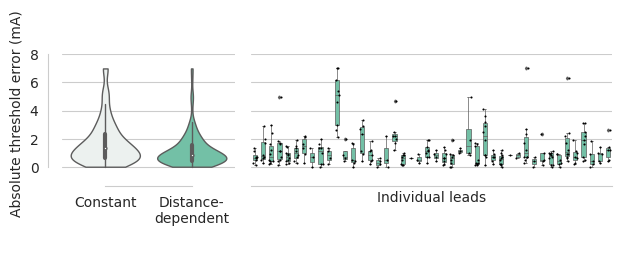

In [24]:
yticks = np.arange(0,9,2)

sns.set_style("whitegrid")
plt.rc('font', size=10)

fig = plt.figure()
fig.set_figheight(3.35)
fig.set_figwidth(7.1)

#fig.set_figheight(6.7)
#fig.set_figwidth(14.2)
#fig.suptitle('Effect', fontweight='heavy', fontsize=8, y=0.93)

sns.set_palette(sns.light_palette("mediumaquamarine", 2))
#sns.set_palette(sns.light_palette("mediumaquamarine", 3))

ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(2, 6), loc=(0, 2), colspan=7)

sns.set_style("whitegrid")
#plt.rc('font', size=8)

sns.violinplot(x='id', y='error', data=data_violin, cut=0, scale='count',linewidth=1, ax=ax1)
ax1.set_xlabel(' ')
ax1.set_ylabel('Absolute threshold error (mA)')
ax1.set_yticks(yticks)

ax1.set_xticks(ticks=[0,1], labels = ('Constant','Distance-\ndependent'))
#ax1.set_xticks(ticks=[0,1,2], labels = ('Random','Constant','Distance-\ndependent'))

#kwargs={'rotation':'vertical'}
#ax1.set_xticklabels(('Random','Constant','Distance-dependent'), **kwargs )
#ax1.xticks(ticks=[0,1,2], labels = ('Random','Constant','Distance-dependent'), rotation='vertical')

sns.boxplot(x="leadID", y="SuggestedCurrentB", data=data, color='mediumaquamarine', width=0.5, linewidth=0.5, fliersize=1.5, ax=ax2)
sns.stripplot(x="leadID", y="SuggestedCurrentB", data=data, color="black", jitter=0.25, size=1.5, ax=ax2)
ax2.set_xlabel('Individual leads')
ax2.set_ylabel('')
ax2.set_xticks([])
ax2.set_yticks(yticks, labels='')

sns.despine(offset=10, trim=True, ax=ax1)
sns.despine(offset=10, left=True, ax=ax2)

plt.savefig('/home/alba/00_WorkingData/Fig_man_Simon/fig3.png', dpi=300, bbox_inches='tight')